In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Spandana runs this
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"C:\Users\Thinking1\vsc_workspace\FDS"

# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTrain.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Thinking1\\vsc_workspace\\FDS'

In [27]:
#Nirjala run this
import os
import pandas as pd

# Download the dataset
path = r"/Users/nirjalagurung/IEEE-CIS-Fraud-Detection"
# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file
csv_path = os.path.join(path, "fraudTrain.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

Files in dataset directory: ['FraudDetectors4.ipynb', 'fraudTrain_processed.csv', 'FraudDetectors.ipynb', 'testing.ipynb', 'ReadME', 'fraudTrain.csv', '.git', 'fraudTest.csv']
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender             

In [ ]:
import os
import pandas as pd
#import kagglehub

# Download the dataset
path = r"/Users/sumeyahussein/Desktop/fraud"
# List all files in the downloaded directory
print("Files in dataset directory:", os.listdir(path))

# Load the CSV file (assuming it is named fraudTest.csv in the downloaded files)
csv_path = os.path.join(path, "fraudTrain.csv")
df = pd.read_csv(csv_path)

# Display the DataFrame
print(df.head())

In [28]:
# Print the number of rows and columns
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 1296675
Number of Columns: 23


In [29]:
# Count the occurrences of each unique value in the 'is_fraud' column
print(df['is_fraud'].value_counts())

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [30]:
# Show the type of data in each column
data_types = df.dtypes
print("\nData Types:\n", data_types)


Data Types:
 Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [31]:
# Calculate the number of missing values and their percentages for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# Create a DataFrame 
missing_df = pd.DataFrame({
    'Missing Data': missing_data,
    'Missing Percentage': missing_percentage
}, index=df.columns)

# Filter out columns with no missing data to focus on relevant features
missing_df_filtered = missing_df[missing_df['Missing Data'] > 0]

# Check if there are any columns with missing data to visualize
if not missing_df_filtered.empty:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=missing_df_filtered.index, y=missing_df_filtered['Missing Percentage'], palette="viridis")

    for i, (value, pct) in enumerate(zip(missing_df_filtered['Missing Data'], missing_df_filtered['Missing Percentage'])):
        ax.text(i, pct, f'{int(value)}', ha='center', va='bottom')

    # Customize plot labels and title
    plt.ylabel('Percentage of Missing Values')
    plt.title('Missing Data Analysis')
    ax.set_xlabel('Features with Missing Values')
    ax.tick_params(axis='x', rotation=90)
    ax.set_yscale('log')  

    plt.show()
else:
    # If no missing data is found, print a message instead of plotting
    print("No missing data found in the dataset.")

No missing data found in the dataset.


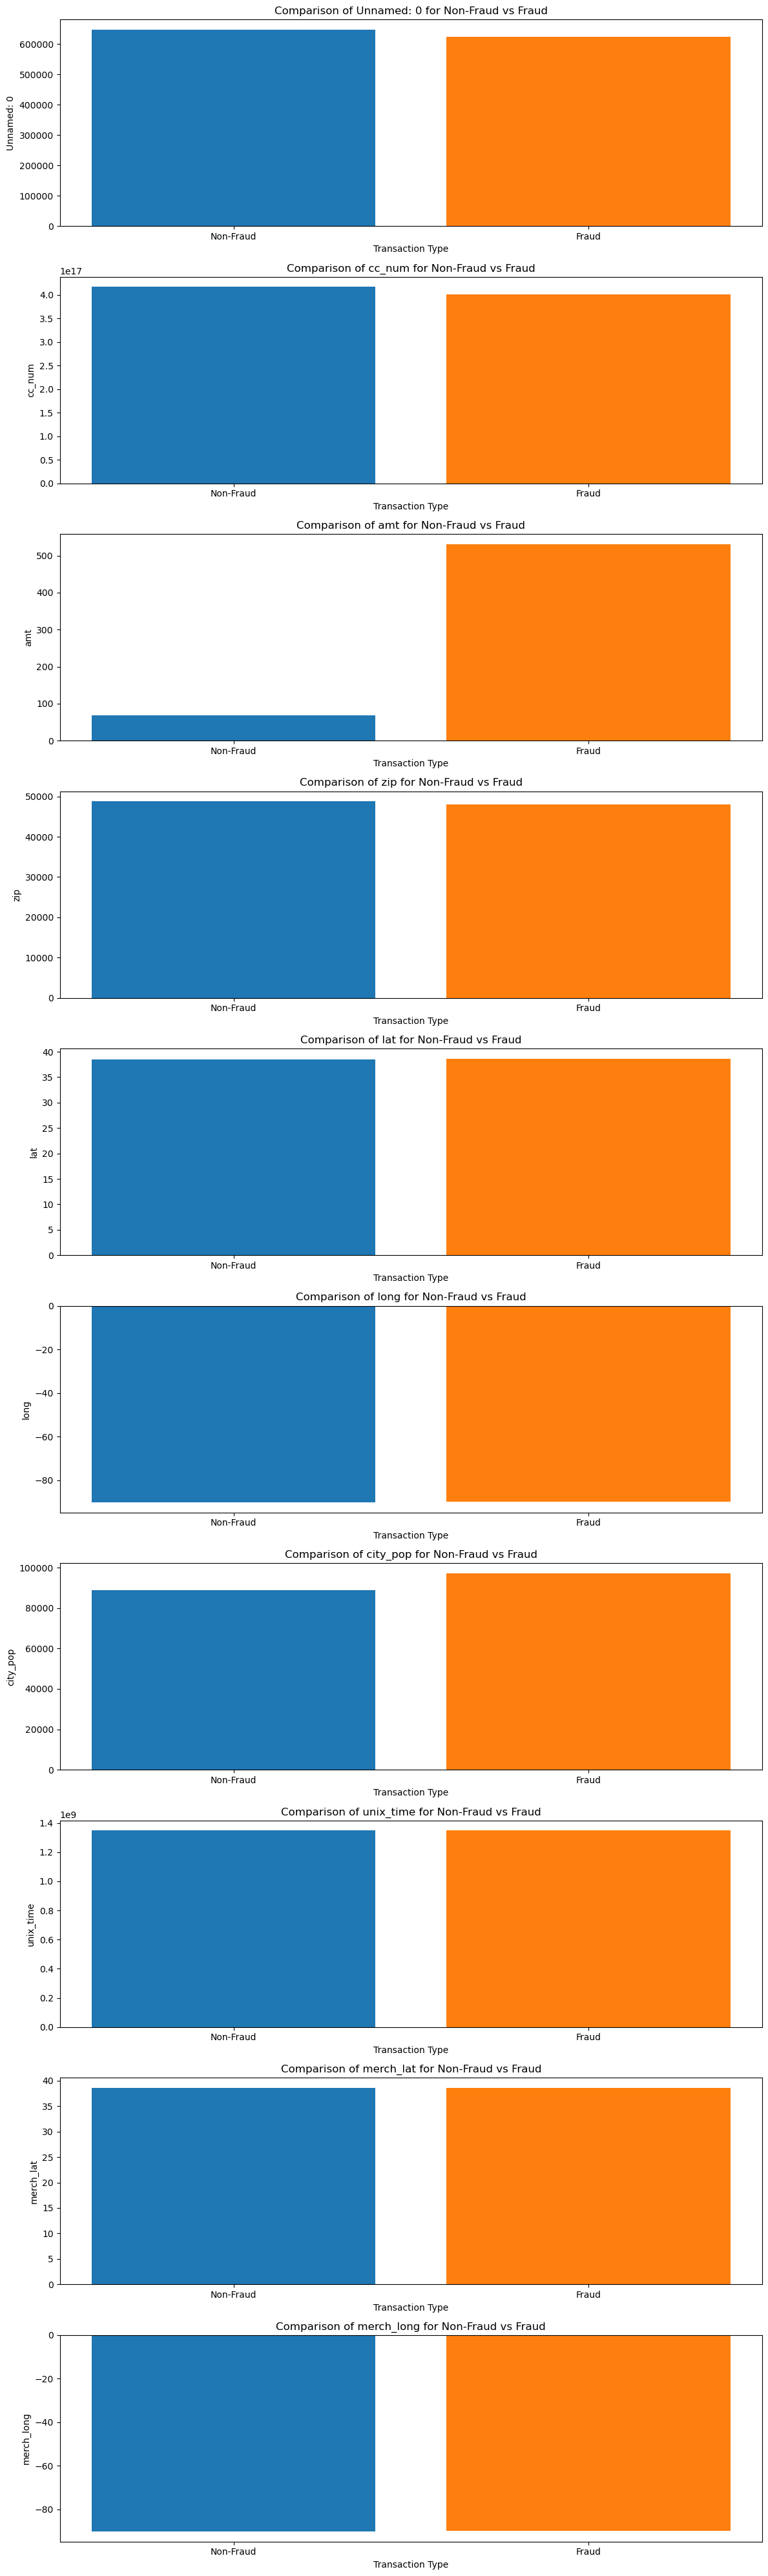

         Unnamed: 0 trans_date_trans_time            cc_num  \
2449           2449   2019-01-02 01:06:37     4613314721966   
2472           2472   2019-01-02 01:47:29   340187018810220   
2523           2523   2019-01-02 03:05:23   340187018810220   
2546           2546   2019-01-02 03:38:03     4613314721966   
2553           2553   2019-01-02 03:55:47   340187018810220   
...             ...                   ...               ...   
1295399     1295399   2020-06-21 01:00:08  3524574586339330   
1295491     1295491   2020-06-21 01:53:35  3524574586339330   
1295532     1295532   2020-06-21 02:16:56  4005676619255478   
1295666     1295666   2020-06-21 03:26:20  3560725013359375   
1295733     1295733   2020-06-21 03:59:46  4005676619255478   

                                     merchant       category      amt  \
2449                   fraud_Rutherford-Mertz    grocery_pos   281.06   
2472         fraud_Jenkins, Hauck and Friesen  gas_transport    11.52   
2523                   f

In [32]:
# Separate the data by is_fraud values
fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

# Calculate means for numerical features by fraud type, looping over is_fraud
numerical_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'is_fraud']

fraud_means = fraud_df[numerical_columns].mean()
non_fraud_means = non_fraud_df[numerical_columns].mean()

# Plotting the comparisons
fig, ax = plt.subplots(len(numerical_columns), 1, figsize=(12, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns):
    ax[i].bar(['Non-Fraud', 'Fraud'], [non_fraud_means[col], fraud_means[col]], color=['#1f77b4', '#ff7f0e'])
    ax[i].set_title(f'Comparison of {col} for Non-Fraud vs Fraud')
    ax[i].set_ylabel(col)
    ax[i].set_xlabel('Transaction Type')
    
plt.tight_layout()
plt.show()

# Filter rows with is_fraud equal to 1
fraudulent_transactions = df[df['is_fraud'] == 1]

# Display the rows with is_fraud == 1
print(fraudulent_transactions)


In [33]:
# Check if 'is_fraud' column contains only 0 and 1
unique_values = df['is_fraud'].unique()

if set(unique_values) == {0, 1}:
    print("The 'is_fraud' column is in the correct binary format (0 and 1) with no anomalies.")
else:
    print("Anomalies found in 'is_fraud' column:")
    print(f"Unexpected values: {unique_values}")


The 'is_fraud' column is in the correct binary format (0 and 1) with no anomalies.


Unnamed: 0: 0 outliers found.
cc_num: 118122 outliers found.
amt: 62772 outliers found.
zip: 0 outliers found.
lat: 4636 outliers found.
long: 49624 outliers found.
city_pop: 241240 outliers found.
unix_time: 0 outliers found.
merch_lat: 4918 outliers found.
merch_long: 41728 outliers found.
Outliers in column cc_num replaced with median value: 3521417320836166.0
Outliers in column amt replaced with median value: 47.28
Outliers in column lat replaced with median value: 39.3543
Outliers in column long replaced with median value: -87.4769
Outliers in column city_pop replaced with median value: 2456.0
Outliers in column merch_lat replaced with median value: 39.365283000000005
Outliers in column merch_long replaced with median value: -87.440911
170203 rows identified as outliers using Z-score method.
Rows with Z-score outliers have been dropped.


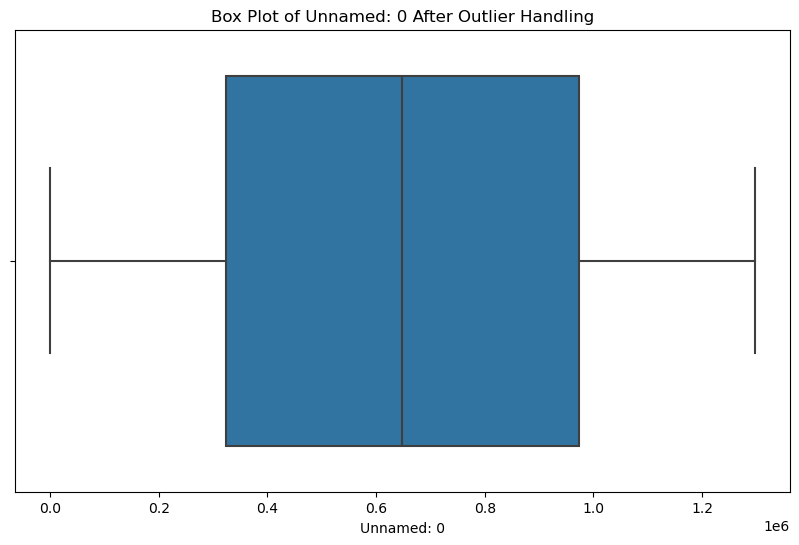

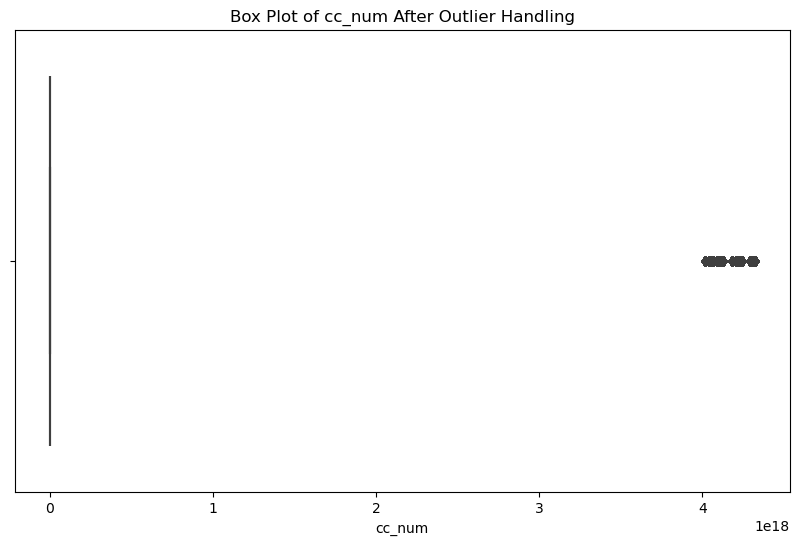

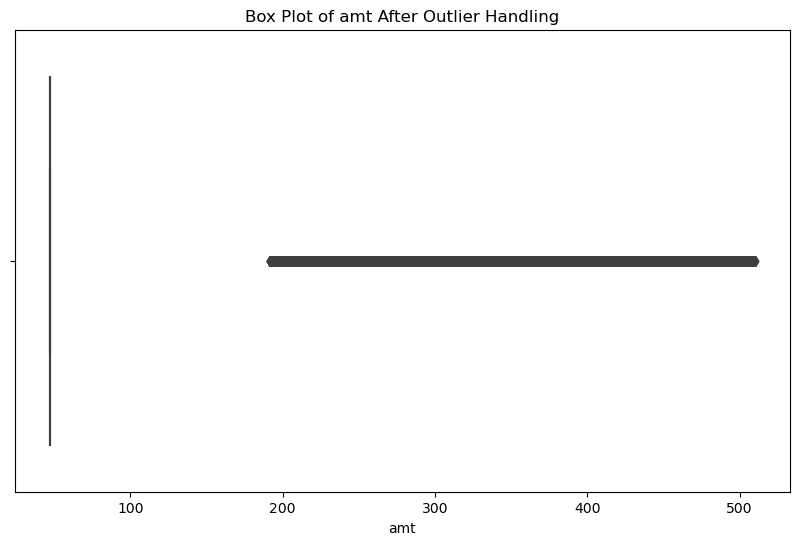

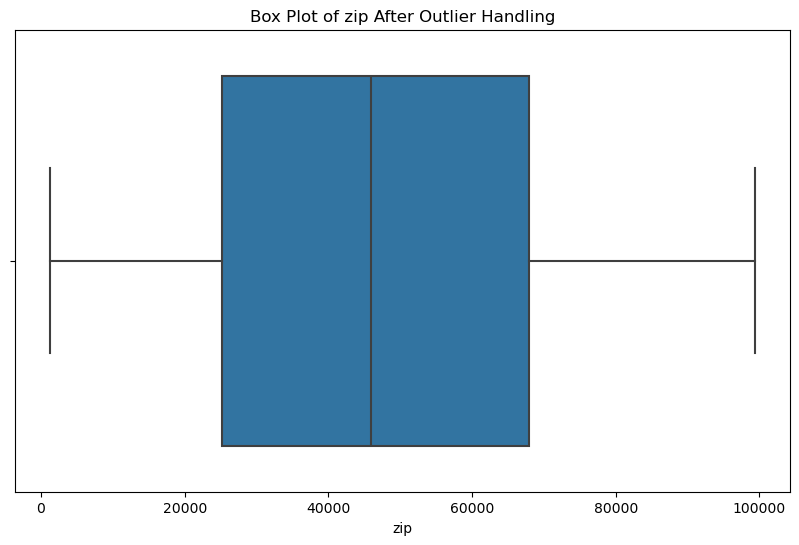

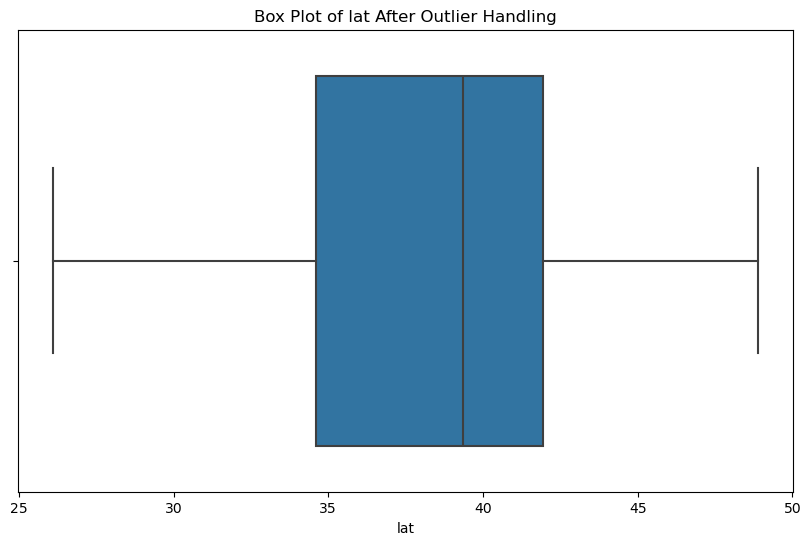

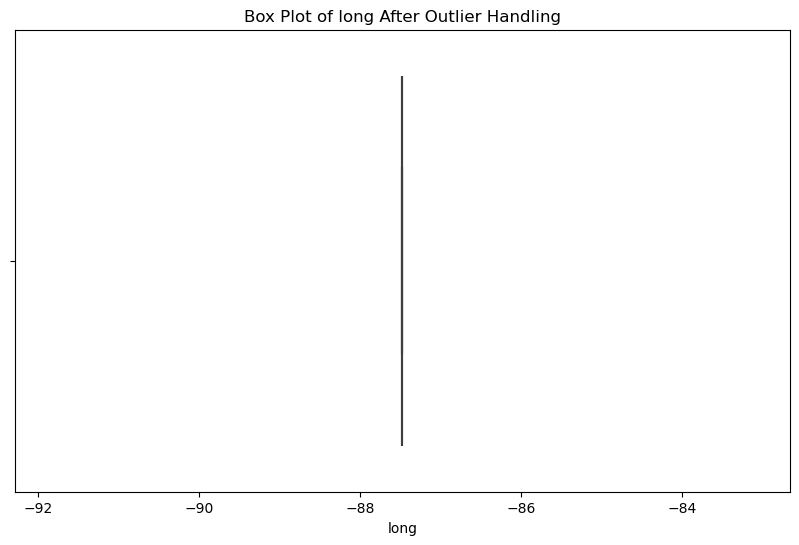

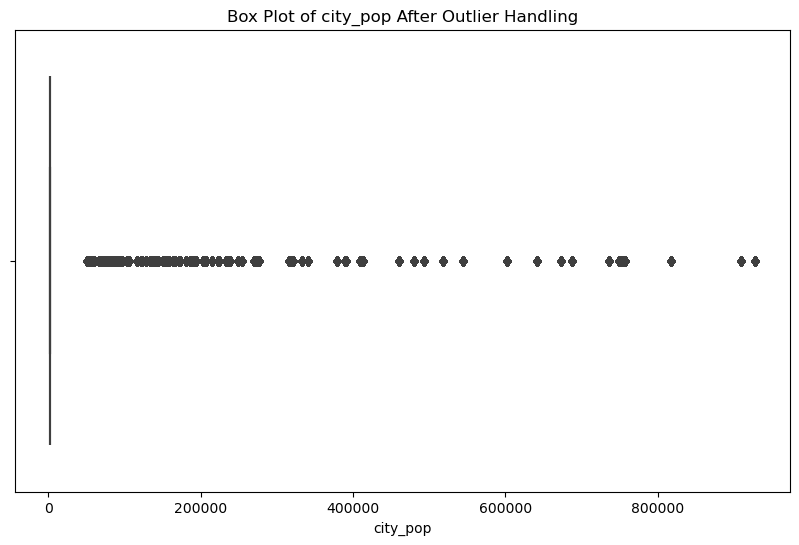

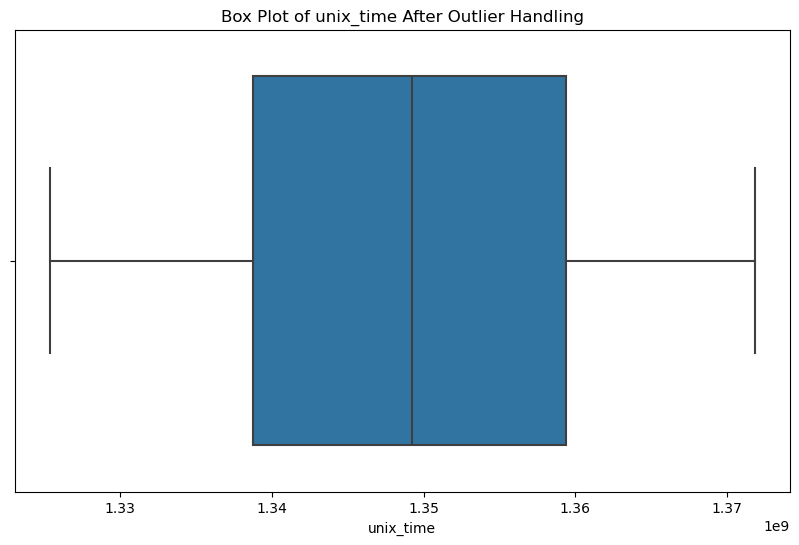

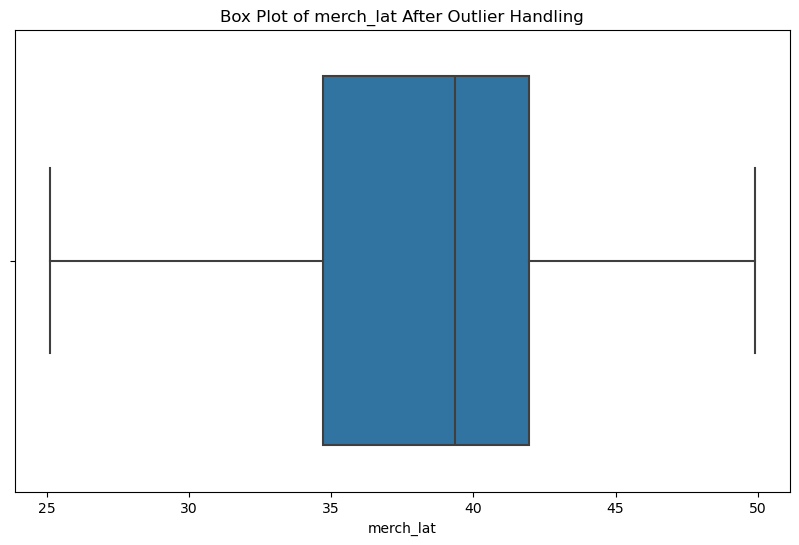

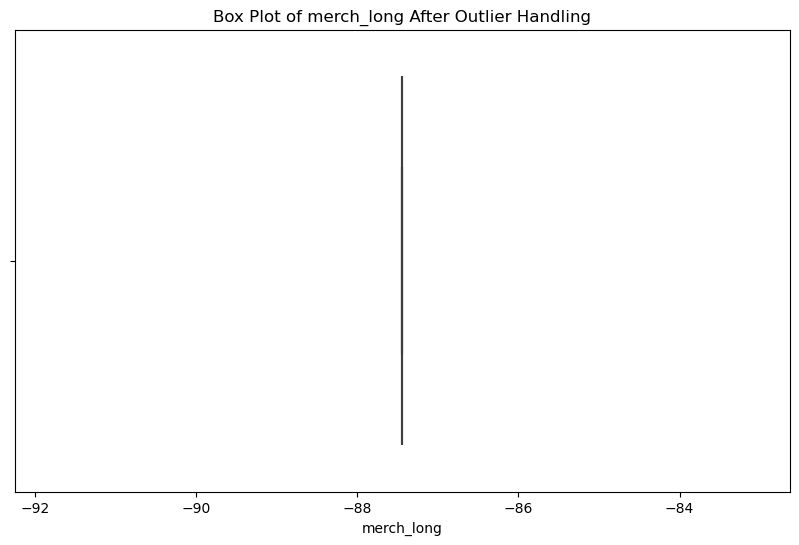

Unique values in trans_date_trans_time:
trans_date_trans_time
2020-06-01 01:37:47    4
2020-04-14 23:52:32    3
2019-12-22 21:00:56    3
2019-01-15 06:58:17    3
2019-12-22 02:45:37    3
                      ..
2019-07-13 20:11:45    1
2019-07-13 20:12:00    1
2019-07-13 20:13:02    1
2019-07-13 20:13:37    1
2020-06-21 12:13:37    1
Name: count, Length: 1102602, dtype: int64

Unique values in merchant:
merchant
fraud_Kilback LLC                       3826
fraud_Cormier LLC                       3127
fraud_Schumm PLC                        3072
fraud_Dickinson Ltd                     2976
fraud_Kuhn LLC                          2962
                                        ... 
fraud_Boyer-Haley                        634
fraud_Little-Gleichner                   624
fraud_Reichert-Weissnat                  622
fraud_Medhurst, Labadie and Gottlieb     618
fraud_Hahn, Douglas and Schowalter       602
Name: count, Length: 693, dtype: int64

Unique values in category:
category
gas_transpor

In [34]:
from scipy.stats import zscore

# Load your CSV file into a DataFrame
#df = pd.read_csv('/Users/sumeyahussein/Desktop/fraud/fraudTrain.csv')

# Separate the rows where is_fraud is False
df_no_fraud = df[df['is_fraud'] == 0].copy()

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numerical_columns = df_no_fraud.select_dtypes(include=['float64', 'int64']).columns
outliers_dict = {}

for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        outliers = find_outliers_iqr(df_no_fraud, col)
        outliers_dict[col] = outliers
        print(f"{col}: {len(outliers)} outliers found.")

for col, outliers in outliers_dict.items():
    if not outliers.empty:
        # Strategy: Replace outliers with the median
        median_value = df_no_fraud[col].median()
        df_no_fraud.loc[(df_no_fraud[col] < outliers[col].min()) | (df_no_fraud[col] > outliers[col].max()), col] = median_value
        print(f"Outliers in column {col} replaced with median value: {median_value}")

# Finding outliers with z score
z_scores = df_no_fraud[numerical_columns].apply(zscore)
outliers_z = (z_scores.abs() > 3).any(axis=1)
outlier_rows = df_no_fraud[outliers_z]

if outlier_rows.empty:
    print("No outliers found using Z-score method.")
else:
    print(f"{len(outlier_rows)} rows identified as outliers using Z-score method.")
    # Strategy: Drop rows with Z-score outliers
    df_no_fraud = df_no_fraud[~outliers_z]
    print("Rows with Z-score outliers have been dropped.")

for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df_no_fraud[col])
        plt.title(f"Box Plot of {col} After Outlier Handling")
        plt.show()

categorical_columns = df_no_fraud.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:\n{df_no_fraud[col].value_counts()}\n")

# Combine the processed rows with the rest of the DataFrame
df_combined = pd.concat([df[df['is_fraud'] == 1], df_no_fraud])

# Writing cleaned dataset, free of outliers or with outliers handled, to a CSV file
#df.to_csv("/Users/sumeyahussein/Desktop/fraud/fraudTrain_processed.csv", index=False)
#df.to_csv("/Users/nirjalagurung/IEEE-CIS-Fraud-Detection", index=False)


In [35]:
#label encoding before feature selection
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Identify all categorical features in the dataset
categorical_features = df.select_dtypes(include=['object', 'category']).columns

# Apply Label Encoding to each categorical feature
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

# Display the first few rows of the modified categorical columns
print(df[categorical_features].head())

   trans_date_trans_time  merchant  category  first  last  gender  street  \
0                      0       514         8    162    18       0     568   
1                      1       241         4    309   157       0     435   
2                      2       390         0    115   381       1     602   
3                      3       360         2    163   463       1     930   
4                      4       297         9    336   149       1     418   

   city  state  job  dob  trans_num  
0   526     27  370  779      56438  
1   612     47  428  607     159395  
2   468     13  307  302     818703  
3    84     26  328  397     544575  
4   216     45  116  734     831111  


In [36]:
#feature selection using RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Prepare the dataset
X = df.drop(columns=['is_fraud'])  # Drop the target column
y = df['is_fraud']  # Define the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Initialize the model (Logistic Regression in this case)
model = LogisticRegression(max_iter=1000)

# Initialize RFE with the desired estimator
n_features_to_select = 10  # Specify the number of features you want to select
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Identify the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Selected Features: Index(['merchant', 'amt', 'last', 'street', 'city', 'zip', 'city_pop', 'dob',
       'trans_num', 'unix_time'],
      dtype='object')


In [37]:
#feature selection using fishers score
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif  # Fisher's Score equivalent for classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare the dataset
X = df.drop(columns=['is_fraud'])  # Drop the target column
y = df['is_fraud']  # Define the target column

# Apply Fisher's Score (ANOVA F-value)
# Select top k features; adjust k based on your needs
k = 10  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)

# Fit and transform the dataset
X_selected = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print("Fisher's Score for Features:")
print(feature_scores)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Top {k} Selected Features:")
print(selected_features)


Fisher's Score for Features:
                  Feature         Score
5                     amt  65576.034604
4                category    529.581979
17                    dob    191.642991
8                  gender     75.721106
19              unix_time     33.432153
1   trans_date_trans_time     29.592297
0              Unnamed: 0     29.472521
6                   first     13.435552
12                    zip      6.060474
15               city_pop      5.915552
10                   city      5.673230
13                    lat      4.651270
20              merch_lat      3.928648
11                  state      3.879209
21             merch_long      3.841981
14                   long      3.839715
9                  street      2.719460
2                  cc_num      1.249028
18              trans_num      0.839017
3                merchant      0.372986
7                    last      0.012013
16                    job      0.011285
Top 10 Selected Features:
Index(['Unnamed: 0', 'tra

In [38]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Unnamed: 0                 int64
trans_date_trans_time      int64
cc_num                     int64
merchant                   int64
category                   int64
amt                      float64
first                      int64
last                       int64
gender                     int64
street                     int64
city                       int64
state                      int64
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                        int64
dob                        int64
trans_num                  int64
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [ ]:
# outliers but a different visulization 

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import zscore

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outlier counts
outliers_count = {}

# Calculate outlier counts using IQR
for col in numerical_columns:
    if col != 'is_fraud':  # Skip the target column
        outliers_count[col] = find_outliers_iqr(df, col)

# Convert to DataFrame for easy visualization
outliers_df = pd.DataFrame(outliers_count.items(), columns=['Column', 'Outlier Count'])

# Plot a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=outliers_df, x='Column', y='Outlier Count', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Number of Outliers in Each Column (IQR Method)")
plt.xlabel("Columns")
plt.ylabel("Outlier Count")
plt.show()


In [ ]:
#changing float into string for easier feature selection

# Print current data types
data_types = df.dtypes
#print("\nData Types:\n", data_types)

# Convert all float columns to strings
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype(str)

# Verify the conversion
print("\nUpdated Data Types:\n", df.dtypes)

df.to_csv("fraudTrain_processed.csv", index=False)
#df.to_csv("/Users/sumeyahussein/Desktop/fraud/fraudTrain_processed.csv", index=False)

In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Feature Engineering
unused_cols = ['Unnamed: 0', 'first', 'last', 'unix_time', 'gender', 'job', 'dob', 'state', 'trans_num', 'merchant']
     
# Ensure all columns exist in the DataFrame before dropping
unused_cols = [col for col in unused_cols if col in df.columns]
df.drop(columns=unused_cols, inplace=True)

# Check remaining DataFrame structure
df.info()

# Drop the original timestamp column after feature extraction
df.drop(columns=['trans_date_trans_time'], inplace=True)

# Output the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  int64  
 1   cc_num                 1296675 non-null  int64  
 2   category               1296675 non-null  int64  
 3   amt                    1296675 non-null  float64
 4   street                 1296675 non-null  int64  
 5   city                   1296675 non-null  int64  
 6   zip                    1296675 non-null  int64  
 7   lat                    1296675 non-null  float64
 8   long                   1296675 non-null  float64
 9   city_pop               1296675 non-null  int64  
 10  merch_lat              1296675 non-null  float64
 11  merch_long             1296675 non-null  float64
 12  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 128.6 MB
             cc_num  cate

In [40]:
print("\n Data Types:\n", df.dtypes)


 Data Types:
 cc_num          int64
category        int64
amt           float64
street          int64
city            int64
zip             int64
lat           float64
long          float64
city_pop        int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object


In [ ]:
# Calculate the variance of each feature
X_train.var(axis=0)

In [ ]:
plot_accuracies(accuracies_list=k_best_accuracy_list)

In [41]:
from sklearn.model_selection import train_test_split

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

print(X_train.dtypes)
print(X_test.dtypes)

Training set size: (1037340, 11)
Test set size: (259335, 11)
cc_num          int64
category        int64
amt           float64
street          int64
city            int64
zip             int64
lat           float64
long          float64
city_pop        int64
merch_lat     float64
merch_long    float64
dtype: object
cc_num          int64
category        int64
amt           float64
street          int64
city            int64
zip             int64
lat           float64
long          float64
city_pop        int64
merch_lat     float64
merch_long    float64
dtype: object


In [42]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

# Training Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # Get probability estimates for positive class

accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_dt)  # Calculate AUC

# Printing metrics
print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision)
print("Decision Tree Recall:", recall)
print("Decision Tree F1 Score:", f1)
print("Decision Tree AUC:", auc)

# Confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9958509264079279
Decision Tree Precision: 0.9958892073222622
Decision Tree Recall: 0.9958509264079279
Decision Tree F1 Score: 0.9958697469403663
Decision Tree AUC: 0.8265610438737692

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.64      0.66      0.65      1520

    accuracy                           1.00    259335
   macro avg       0.82      0.83      0.82    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
 [[257263    552]
 [   524    996]]


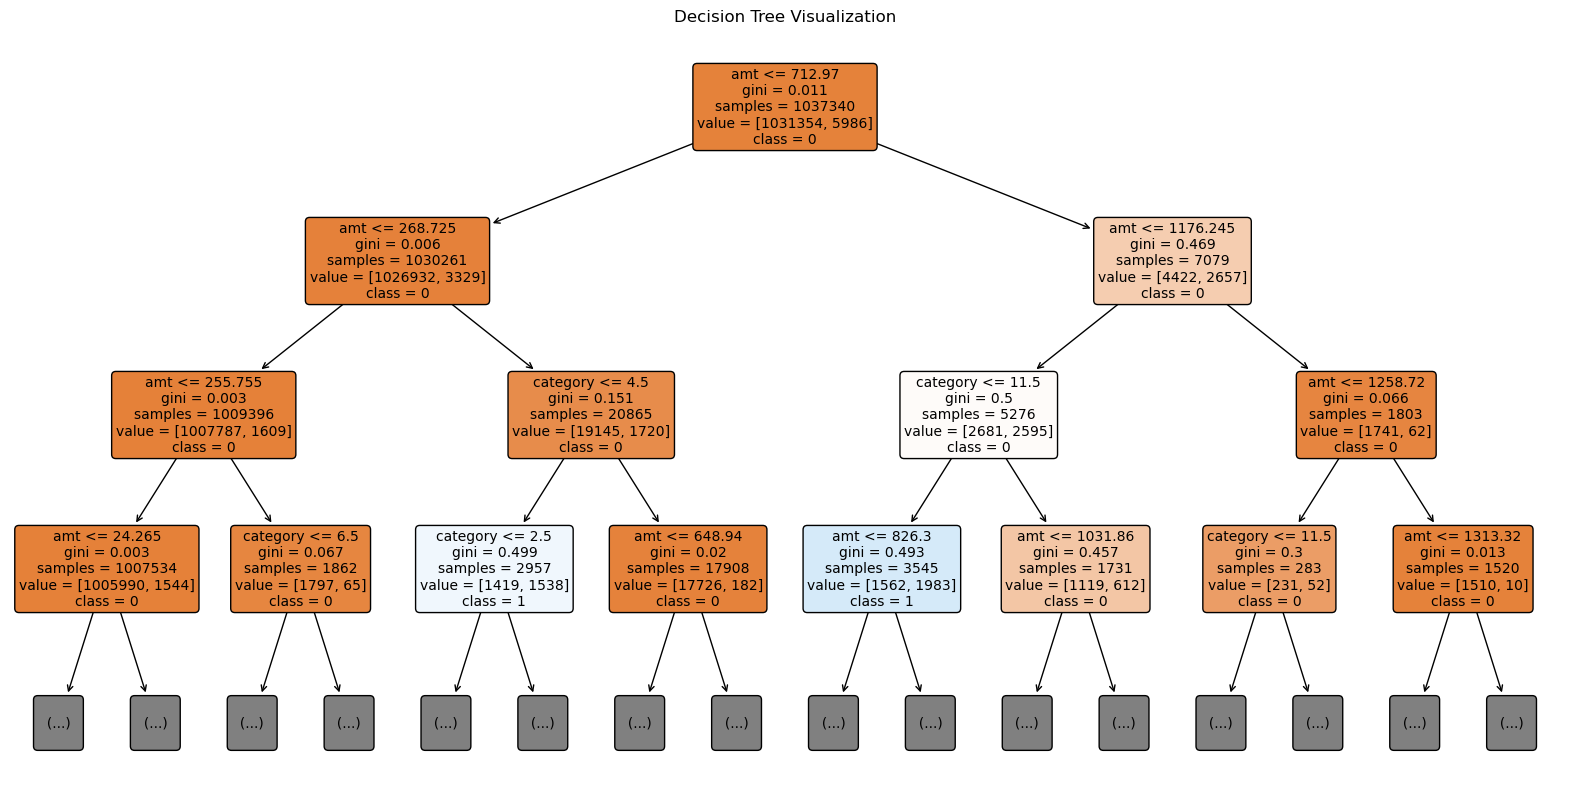

In [43]:
# add visulizations 

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# visualization plot
plt.figure(figsize=(20, 10))  # Set figure size for clarity
plot_tree(
    dt_model,
    feature_names=X_train.columns if isinstance(X_train, pd.DataFrame) else None,
    class_names=[str(c) for c in dt_model.classes_],
    filled=True,  
    rounded=True,  
    fontsize=10, 
    max_depth=3 # Limiting the depth for better readability 
)
plt.title("Decision Tree Visualization")
plt.show()

In [47]:
#  K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Scaling the data for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]  # Get probability estimates for positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_knn)  # Calculate AUC

# Print metrics
print("K-Nearest Neighbors Accuracy:", accuracy)
print("K-Nearest Neighbors Precision:", precision)
print("K-Nearest Neighbors Recall:", recall)
print("K-Nearest Neighbors F1 Score:", f1)
print("K-Nearest Neighbors AUC:", auc)

# Confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.9957236778683941
K-Nearest Neighbors Precision: 0.9951150332867205
K-Nearest Neighbors Recall: 0.9957236778683941
K-Nearest Neighbors F1 Score: 0.9952463412222258
K-Nearest Neighbors AUC: 0.8854059405612144

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.71      0.45      0.55      1520

    accuracy                           1.00    259335
   macro avg       0.86      0.73      0.78    259335
weighted avg       1.00      1.00      1.00    259335

Confusion Matrix:
 [[257539    276]
 [   833    687]]


In [48]:
#  Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
import pandas as pd
import numpy as np

# Scaling the data for Logistic Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]  # Get probability estimates for positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_lr)  # Calculate AUC

# Print metrics
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Precision:", precision)
print("Logistic Regression Recall:", recall)
print("Logistic Regression F1 Score:", f1)
print("Logistic Regression AUC:", auc)

# Confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9935835887944164
Logistic Regression Precision: 0.9883088260974822
Logistic Regression Recall: 0.9935835887944164
Logistic Regression F1 Score: 0.9909391881139967
Logistic Regression AUC: 0.8367060759602204

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

Confusion Matrix:
 [[257671    144]
 [  1520      0]]


In [49]:
# Naive Bayes​
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd
import numpy as np

# Scaling the data for Naive Bayes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Making predictions
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]  # Get probability estimates for positive class

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba_nb)  # Calculate AUC

# Print metrics
print("Naive Bayes Accuracy:", accuracy)
print("Naive Bayes Precision:", precision)
print("Naive Bayes Recall:", recall)
print("Naive Bayes F1 Score:", f1)
print("Naive Bayes AUC:", auc)

# Confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9872944261283668
Naive Bayes Precision: 0.9924384312204221
Naive Bayes Recall: 0.9872944261283668
Naive Bayes F1 Score: 0.9895795981909079
Naive Bayes AUC: 0.8476524833698582

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    257815
           1       0.23      0.49      0.31      1520

    accuracy                           0.99    259335
   macro avg       0.61      0.74      0.65    259335
weighted avg       0.99      0.99      0.99    259335

Confusion Matrix:
 [[255301   2514]
 [   781    739]]


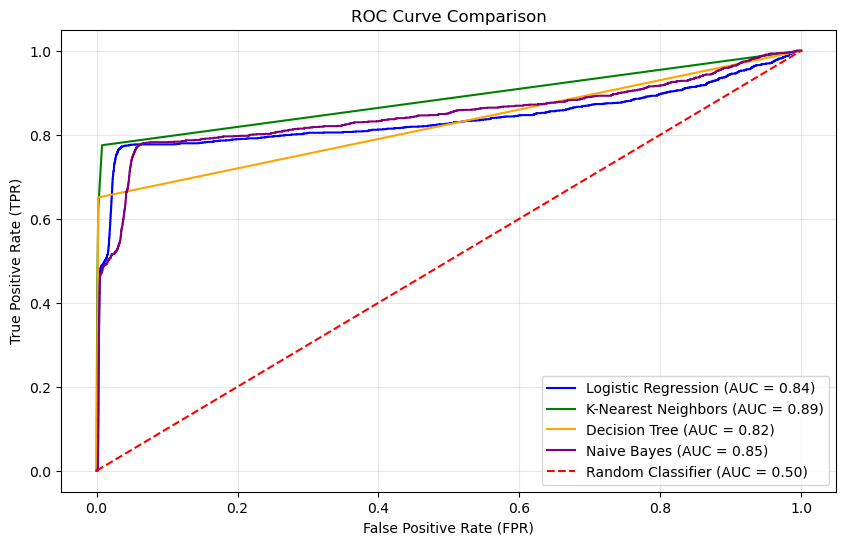

In [50]:
# comparing model viz. ROC curve 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
decision_tree_model = DecisionTreeClassifier(random_state=42)
naive_bayes_model = GaussianNB()

# Train models
logistic_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)
naive_bayes_model.fit(X_train_scaled, y_train)

# Get predicted probabilities for the positive class
y_test_probs_lr = logistic_model.predict_proba(X_test_scaled)[:, 1]
y_test_probs_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
y_test_probs_dt = decision_tree_model.predict_proba(X_test_scaled)[:, 1]
y_test_probs_nb = naive_bayes_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curves and AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_probs_lr)
auc_lr = roc_auc_score(y_test, y_test_probs_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_probs_knn)
auc_knn = roc_auc_score(y_test, y_test_probs_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_probs_dt)
auc_dt = roc_auc_score(y_test, y_test_probs_dt)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_test_probs_nb)
auc_nb = roc_auc_score(y_test, y_test_probs_nb)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color='blue')
plt.plot(fpr_knn, tpr_knn, label=f"K-Nearest Neighbors (AUC = {auc_knn:.2f})", color='green')
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", color='orange')
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})", color='purple')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Classifier (AUC = 0.50)")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Grid search
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search
grid_search_dt.fit(X_train, y_train)

# Best model from grid search
best_dt_model = grid_search_dt.best_estimator_
best_dt_params = grid_search_dt.best_params_

# Cross-validation scores using the best model
dt_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='f1')

print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print("Decision Tree cross-validation scores:", dt_scores)
print("Mean cross-validation score:", np.mean(dt_scores))

Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Decision Tree cross-validation scores: [0.7209721  0.71178844 0.70598994 0.7108046  0.71655329]
Mean cross-validation score: 0.7132216718259279


In [67]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearch to the training data
grid_search_knn.fit(X_train, y_train)

# Get the best estimator and parameters
best_knn_model = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_

# Cross-validation scores using the best KNN model
knn_scores = cross_val_score(best_knn_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Best Parameters for K-Nearest Neighbors Tree: {best_knn_params}")
print("KNN cross-validation scores:", knn_scores)
print("Mean cross-validation score:", np.mean(knn_scores))
    

Best Parameters for K-Nearest Neighbors Tree: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
KNN cross-validation scores: [0.99603312 0.99583068 0.9958114  0.995956   0.99594636]
Mean cross-validation score: 0.9959155146817823


In [68]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'solver': ['liblinear', 'lbfgs'],
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearch to the training data
grid_search_lr.fit(X_train, y_train)

# Get the best estimator and parameters
best_lr_model = grid_search_lr.best_estimator_
best_lr_params = grid_search_lr.best_params_

# Cross-validation scores using the best Logistic Regression model
lr_scores = cross_val_score(best_lr_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Best Parameters for Logistic Regression: {best_lr_params}")
print("lr cross-validation scores:", lr_scores)
print("Mean cross-validation score:", np.mean(lr_scores))
    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
lr cross-validation scores: [0.99359419 0.99360865 0.99357491 0.99380145 0.99375807]
Mean cross-validation score: 0.9936674571500184


In [69]:
# Naive Bayes
nb_model = GaussianNB()

# Define parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearch to the training data
grid_search_nb.fit(X_train, y_train)

# Get the best estimator and parameters
best_nb_model = grid_search_nb.best_estimator_
best_nb_params = grid_search_nb.best_params_

# Cross-validation scores using the best Naive Bayes model
nb_scores = cross_val_score(best_nb_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Best Parameters for Naive Bayes: {best_nb_params}")
print("Naive Bayes cross-validation scores:", nb_scores)
print("Mean cross-validation score:", np.mean(nb_scores))

Best Parameters for Naive Bayes: {'var_smoothing': 1e-09}
Naive Bayes cross-validation scores: [0.9864943  0.98599302 0.99048528 0.98802707 0.98675458]
Mean cross-validation score: 0.9875508512156091


                     Decision Tree       KNN  Logistic Regression  Naive Bayes
Decision Tree             1.000000  0.640403            -0.001663     0.375451
KNN                       0.640403  1.000000             0.000904     0.369520
Logistic Regression      -0.001663  0.000904             1.000000     0.206205
Naive Bayes               0.375451  0.369520             0.206205     1.000000


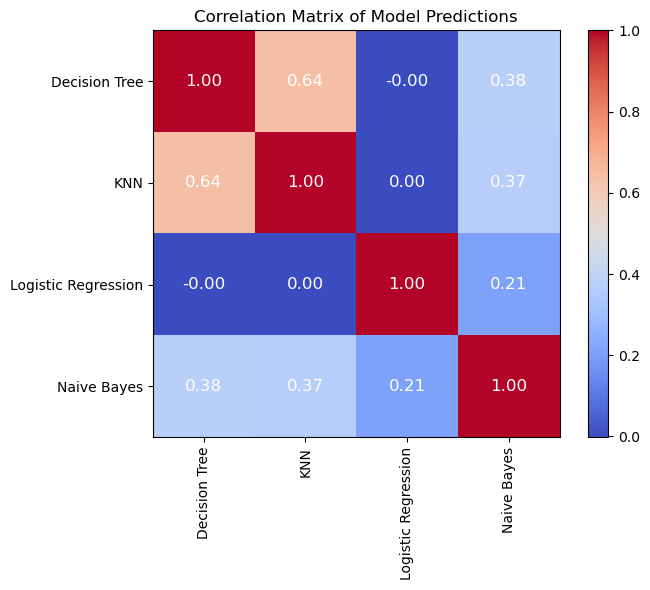

In [80]:
# Get predictions from each model
dt_preds = best_dt_model.predict(X_test)
knn_preds = best_knn_model.predict(X_test)
lr_preds = best_lr_model.predict(X_test)
nb_preds = best_nb_model.predict(X_test)

# Create a DataFrame with the predictions
predictions = pd.DataFrame({
    'Decision Tree': dt_preds,
    'KNN': knn_preds,
    'Logistic Regression': lr_preds,
    'Naive Bayes': nb_preds
})

# Calculate the correlation matrix of model predictions
correlation_matrix = predictions.corr()

# Display the correlation matrix in the exact format
print(correlation_matrix)

# Create the figure and axes for plotting
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the size as needed

# Change color using cmap
cp = ax.matshow(correlation_matrix, cmap='coolwarm')

# Add title to the plot
ax.set_title('Correlation Matrix of Model Predictions')

# Annotate the values inside the correlation plot
for (i, j), z in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f'{z:0.2f}', ha='center', va='center', color='white', fontsize=12)  # Adjust color and size as needed

# Set feature names (column names) as tick labels
feature_names = correlation_matrix.columns

# Set ticks and labels
ax.set_xticks(np.arange(len(feature_names)))  # Set the number of ticks equal to the number of features
ax.set_yticks(np.arange(len(feature_names)))

# Assign feature names as tick labels
ax.set_xticklabels(feature_names, rotation=90, fontsize=10)  # Rotate x labels for readability
ax.set_yticklabels(feature_names, fontsize=10)

# Move the x-axis labels to the bottom
ax.xaxis.set_ticks_position('bottom')  # Set the x-ticks to be at the bottom
ax.xaxis.set_label_position('bottom')  # Ensure the label is also positioned at the bottom

# Add a colorbar
fig.colorbar(cp, ax=ax, fraction=0.046, pad=0.04)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()


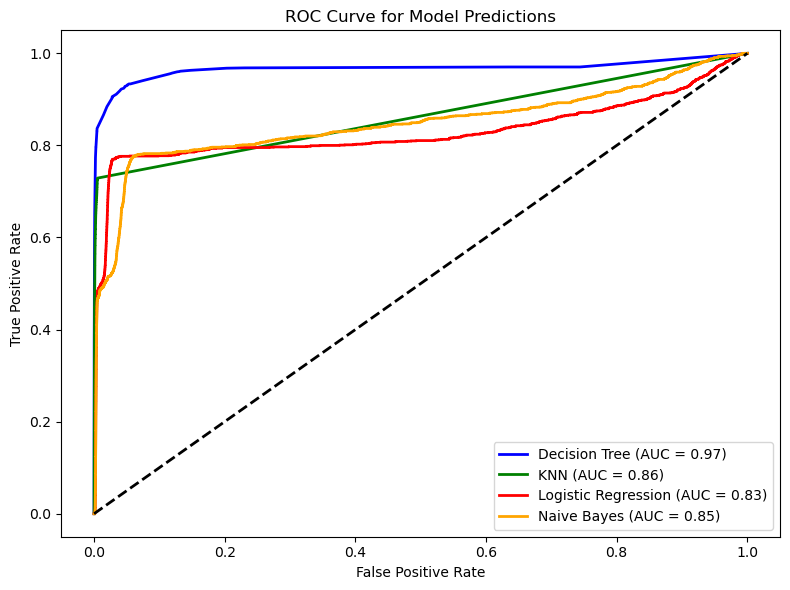

In [82]:
# Get predicted probabilities for the positive class (class 1) for each model
dt_probs = best_dt_model.predict_proba(X_test)[:, 1]
knn_probs = best_knn_model.predict_proba(X_test)[:, 1]
lr_probs = best_lr_model.predict_proba(X_test)[:, 1]
nb_probs = best_nb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for each model
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probs)

# Calculate AUC for each model
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve
plt.figure(figsize=(8, 6))

plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

# Plot the diagonal line for random classifier
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Customize the plot
plt.title('ROC Curve for Model Predictions')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()